In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df_train=pd.read_csv('Mobile_train.csv')
df_test=pd.read_csv('Mobile_test.csv')

In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_train.shape

(2000, 21)

In [5]:
df_train['train/test']='Train'

In [6]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
df_test['train/test']='test'

In [8]:
df_test.shape

(1000, 22)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
df_test.drop('id',axis=1,inplace=True)

In [12]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,train/test
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,test
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,test
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,test
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,test
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,test


In [13]:
# concat train and test data
all=pd.concat([df_train,df_test],axis=0)

In [14]:
all.shape

(3000, 22)

In [15]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_screen  

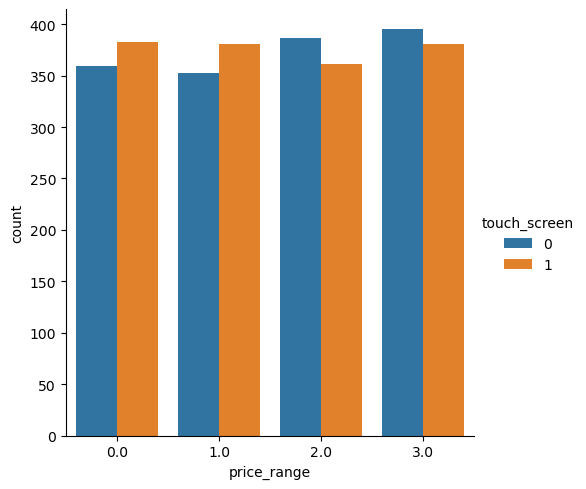

In [16]:
sns.catplot(data=all,x='price_range',kind='count',hue='touch_screen')

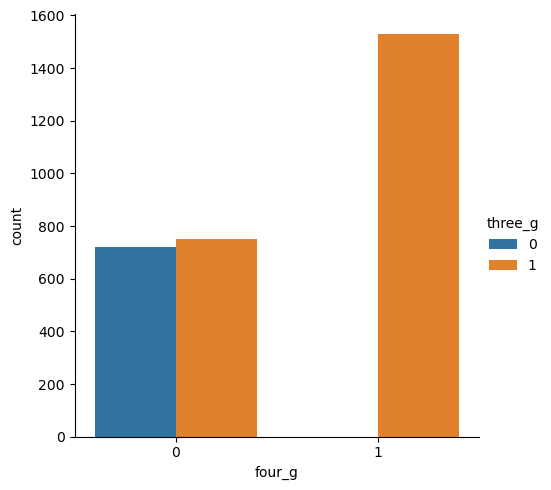

In [17]:
sns.catplot(data=all,x='four_g',kind='count',hue='three_g')

In [18]:
all

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,train/test
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,Train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,Train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,Train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,Train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,test
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,test
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,test
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,test


In [19]:
train_data=all[all['train/test']=='Train']

In [20]:
train_data.shape

(2000, 22)

In [21]:
test_data=all[all['train/test']=='test']

In [22]:
test_data.shape

(1000, 22)

In [23]:
train_data.drop(['train/test'],inplace=True,axis=1)
test_data.drop(['price_range','train/test'],inplace=True,axis=1)

In [24]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [25]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [26]:
from sklearn.model_selection import train_test_split
x=train_data.drop('price_range',axis=1)
y=train_data['price_range']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=lr.predict(x_test)


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,lr.predict(x_train))

0.65375

In [30]:
accuracy_score(y_test,lr.predict(x_test))

0.61

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,dtree.predict(x_train))

1.0

In [33]:
accuracy_score(y_test,dtree.predict(x_test))

0.825

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,knn.predict(x_train))

0.953125

In [36]:
accuracy_score(y_test,knn.predict(x_test))

0.9375

In [37]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,knn.predict(x_test))
print(cls)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        94
         1.0       0.89      0.92      0.90       102
         2.0       0.93      0.92      0.92       120
         3.0       0.98      0.96      0.97        84

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [38]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,nb.predict(x_train))

0.82125

In [40]:
accuracy_score(y_test,nb.predict(x_test))

0.7975

In [41]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
Rforest=RandomForestClassifier()
Rforest.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,Rforest.predict(x_train))

1.0

In [43]:
accuracy_score(y_test,Rforest.predict(x_test))

0.8825

In [44]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,Rforest.predict(x_test))
print(cls)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        94
         1.0       0.81      0.84      0.83       102
         2.0       0.89      0.82      0.86       120
         3.0       0.91      0.96      0.94        84

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



In [45]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

In [46]:
accuracy_train=accuracy_score(y_train,svm.predict(x_train))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.9525
test accuracy 0.95


In [47]:
from sklearn.svm import SVC
svm_s=SVC(kernel='sigmoid')
svm_s.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [48]:
accuracy_train=accuracy_score(y_train,svm_s.predict(x_train))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_s.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.205625
test accuracy 0.18


In [49]:
# LINEAR
from sklearn.svm import SVC
svm_l=SVC(kernel='linear',C=0.1)
svm_l.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [50]:
accuracy_train=accuracy_score(y_train,svm_l.predict(x_train))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_l.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.990625
test accuracy 0.97


In [51]:
from sklearn.svm import SVC
svm_p=SVC(kernel='poly')
svm_p.fit(x_train,y_train)

SVC(kernel='poly')

In [52]:
accuracy_train=accuracy_score(y_train,svm_p.predict(x_train))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_p.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.9625
test accuracy 0.95


In [57]:
param={'n_estimators':[100,105,106,108,110],'criterion':['gini','entropy','log_loss'],'max_depth':[5,6,7,9,10],'min_samples_split':[3,4,5,6,7],'min_samples_leaf':[2,3,4,5]}

In [61]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(Rforest,param,cv=5,scoring='accuracy')

In [ ]:
cv.fit(x_train,y_train)

In [ ]:
cv.best_params_

In [ ]:
y_pred_cv=cv.predict(x_test)
accuracy_score(y_test,y_pred_cv)

In [ ]:
accuracy_score(y_train,cv.predict(x_train))

In [54]:
y_pred_test_data=svm_l.predict(test_data)

In [55]:
test_data['price_range']=y_pred_test_data

In [56]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2.0
